In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
descriptions = pd.read_csv('dataset/data_descriptions.csv')
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [4]:
descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


In [5]:
train.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


Churn Distribution

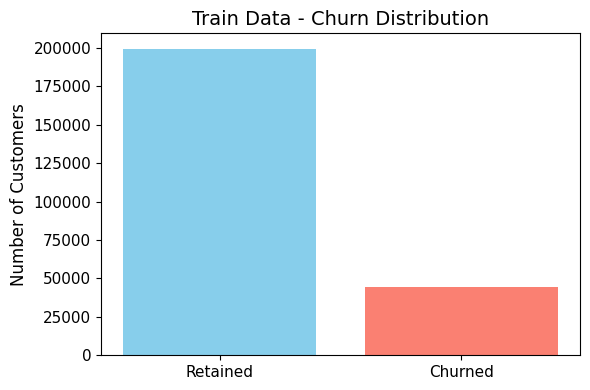

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
counts = train["Churn"].value_counts()
bars = plt.bar(["Retained", "Churned"], counts, color=["skyblue", "salmon"])
plt.title("Train Data - Churn Distribution", fontsize=14)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


our target variable is imbalanced with ~82% non-churners and ~18% churners.

In [6]:
test.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


Checking Data types

In [8]:
print(train.shape, test.shape)
print(train.dtypes)

(243787, 21) (104480, 20)
AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object


Checking for Missing Values

In [10]:
print(train.isna().sum().sort_values(ascending=False))

AccountAge                  0
ContentDownloadsPerMonth    0
CustomerID                  0
SubtitlesEnabled            0
ParentalControl             0
WatchlistSize               0
Gender                      0
SupportTicketsPerMonth      0
UserRating                  0
GenrePreference             0
AverageViewingDuration      0
MonthlyCharges              0
ViewingHoursPerWeek         0
DeviceRegistered            0
MultiDeviceAccess           0
ContentType                 0
PaperlessBilling            0
PaymentMethod               0
SubscriptionType            0
TotalCharges                0
Churn                       0
dtype: int64


There are no missing values and we donot need to do any imputation

In [9]:
numerical_features = ['AccountAge'
,'MonthlyCharges'
,'TotalCharges'
,'ViewingHoursPerWeek'
,'AverageViewingDuration'
,'ContentDownloadsPerMonth'
,'UserRating'
,'SupportTicketsPerMonth'
,'WatchlistSize']

categorical_features = [
    'SubscriptionType'
,'PaymentMethod'
,'PaperlessBilling'
,'ContentType'
,'MultiDeviceAccess'
,'DeviceRegistered'
,'GenrePreference'
,'Gender'
,'ParentalControl'
,'SubtitlesEnabled'
]

Building Preprocessing Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
]) #this pipeline fills in missing numeric values with the median of that column, as median is robust to the outliers unlike mean
   #standardScaler() transforms numeric features so they have mean = 0 and standard deviation = 1, standardizing helps the optimizer converge faster and prevents large-scale features from dominating smaller ones
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), #fills missing categorical values with most frequently occuring one
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
]) #one hot encoder converts categories into a set of binary coluns, one for each unique category
   #handle_unknown = 'ignore' prevents the model from crashing if a new category appears in the future data that wasn't in the training

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = train.drop(['CustomerID','Churn'],axis = 1)
y = train['Churn']

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

Imbalance helpers

In [19]:
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
classes = np.array([0,1])
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train) #used for LogReg, RandomForest, HistGB
w0, w1 = cw[0], cw[1]
neg, pos = (y_train==0).sum(), (y_train==1).sum()
spw = max((neg / max(1, pos)), 1.0) # scale_pos_weight used for boosting libraries (XGBoost, LightGBM, CatBoost)

#we are doing this so that the model doesn't ignore minority churners

Model Traning and Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier  
# from catboost import CatBoostClassifier  

from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_recall_curve,
    precision_score, recall_score, f1_score, confusion_matrix
)

In [ ]:
models = {}

models["logistic_regression"] = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, class_weight={0:w0,1:w1}, solver="saga", random_state=42))
])

models["logistic_elastic_net"] = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression(max_iter=1500, penalty="elasticnet", l1_ratio=0.5, solver="saga",
                               class_weight={0:w0,1:w1}, random_state=42))
])
models["random_forest"] = Pipeline([
    ("pre", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=400, n_jobs=-1, class_weight={0:w0,1:w1}, random_state=42))
])
models["hist_gradient_boosting"] = Pipeline([
    ("pre", preprocessor),
    ("clf", HistGradientBoostingClassifier(random_state=42))
])

models["xgboost"] = Pipeline([
    ("pre", preprocessor),
    ("clf", XGBClassifier(
        n_estimators=800, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, reg_alpha=0.0, objective="binary:logistic",
        tree_method="hist", n_jobs=-1, random_state=42, scale_pos_weight=spw
    ))
])

models["lightgbm"] = Pipeline([
    ("pre", preprocessor),
    ("clf", LGBMClassifier(
        n_estimators=1200, learning_rate=0.03, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, reg_alpha=0.0, objective="binary", random_state=42,
        n_jobs=-1, scale_pos_weight=spw
    ))
])


In [29]:
def tune_threshold(y_true, y_proba, objective="f2"):
    grid = np.linspace(0.01, 0.99, 99)
    best_t, best_s = 0.5, -1.0
    for t in grid:
        y_pred = (y_proba >= t).astype(int)
        if objective == "recall":
            s = recall_score(y_true, y_pred, zero_division=0)
        else:
            beta = 2.0
            p = precision_score(y_true, y_pred, zero_division=0)
            r = recall_score(y_true, y_pred, zero_division=0)
            s = 0.0 if (beta*beta*p + r) == 0 else (1+beta*beta)*p*r/(beta*beta*p + r)
        if s > best_s:
            best_s, best_t = s, t
    return float(best_t)

In [38]:
def plot_pr_curve(y_true, y_proba, name, save_dir="output"):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    ap = average_precision_score(y_true, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"AP = {ap:.3f}")
    # optional prevalence line
    prevalence = (np.sum(y_true) / len(y_true)) if len(y_true) else 0.0
    plt.hlines(prevalence, 0, 1, linestyles="dashed", label=f"Prevalence = {prevalence:.3f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall: {name}")
    plt.legend()
    plt.tight_layout()
    out = os.path.join(save_dir, f"{name}_pr.png")
    plt.savefig(out)
    plt.show()


def plot_confusion_matrix(cm, classes=("Not churn","Churn"), name="model", save_dir="output"):
    plt.figure(figsize=(4.8,4.2))
    plt.imshow(cm, interpolation="nearest")
    plt.title(f"Confusion matrix: {name}")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    # annotate counts
    thresh = cm.max() / 2.0 if cm.max() else 0.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], "d"),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    out = os.path.join(save_dir, f"{name}_cm.png")
    plt.savefig(out)
    plt.show()

def plot_roc_curve(y_true, y_proba, name, save_dir="output"):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],"--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC: {name}")
    plt.legend()
    plt.tight_layout()
    out = os.path.join(save_dir, f"{name}_roc.png")
    plt.savefig(out)
    plt.show()


Training logistic_regression ...


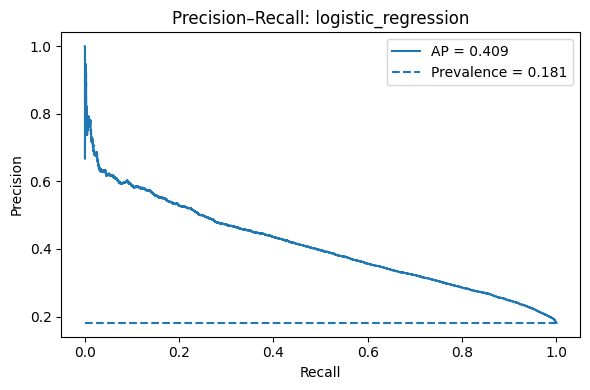

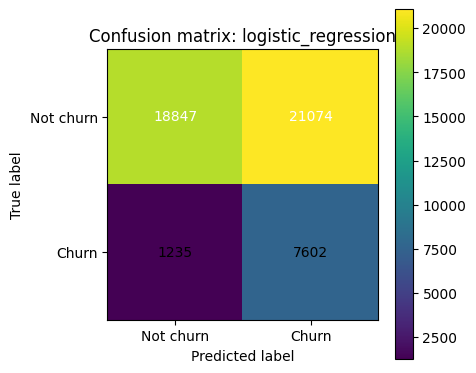

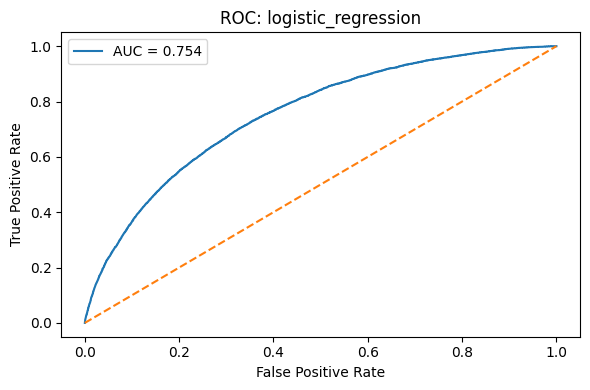

AUC: 0.7544  |  AP: 0.4087  |  F2-tuned threshold: 0.37
Precision: 0.2651  Recall: 0.8602  F1: 0.4053
Confusion matrix [[TN, FP],[FN, TP]]:
 [[18847 21074]
 [ 1235  7602]]

Training logistic_elastic_net ...


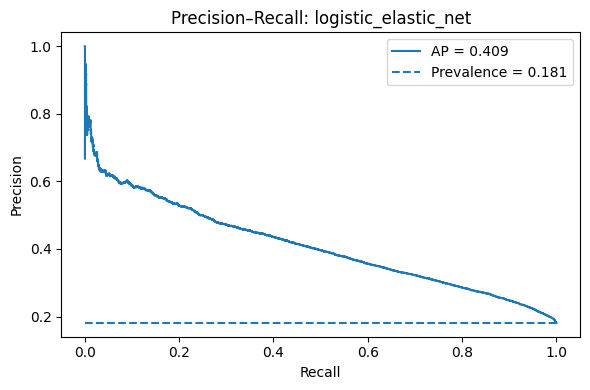

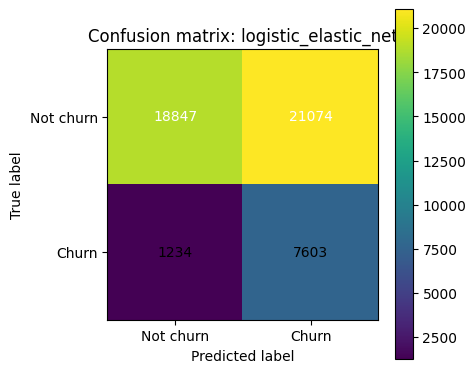

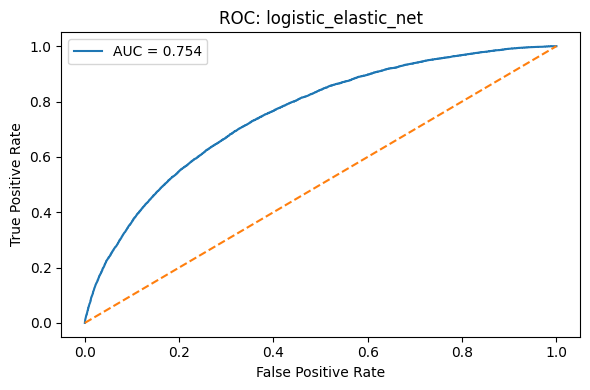

AUC: 0.7544  |  AP: 0.4087  |  F2-tuned threshold: 0.37
Precision: 0.2651  Recall: 0.8604  F1: 0.4053
Confusion matrix [[TN, FP],[FN, TP]]:
 [[18847 21074]
 [ 1234  7603]]

Training random_forest ...


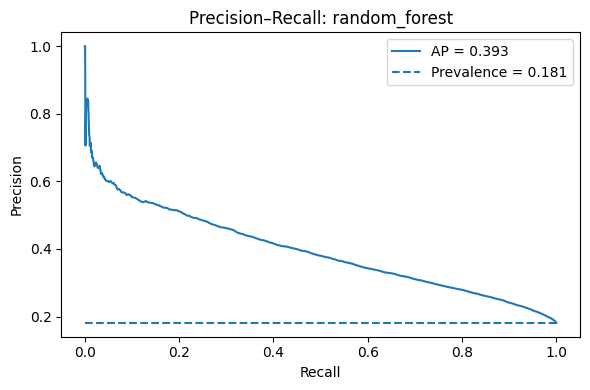

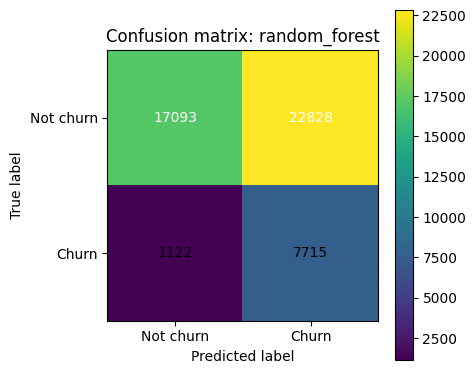

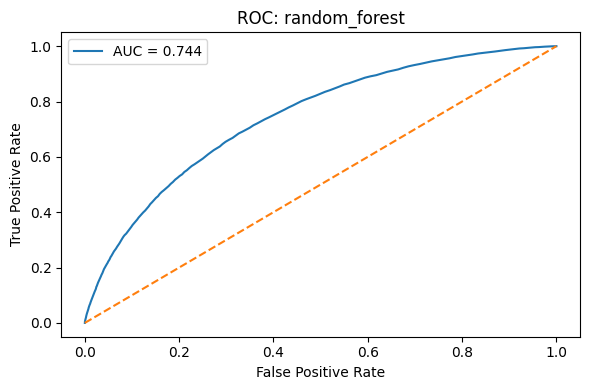

AUC: 0.7437  |  AP: 0.3926  |  F2-tuned threshold: 0.12
Precision: 0.2526  Recall: 0.8730  F1: 0.3918
Confusion matrix [[TN, FP],[FN, TP]]:
 [[17093 22828]
 [ 1122  7715]]

Training hist_gradient_boosting ...


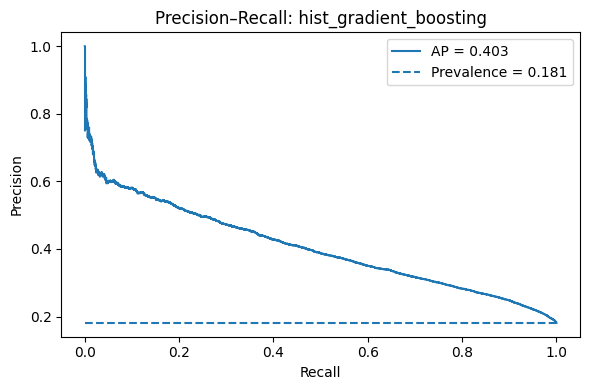

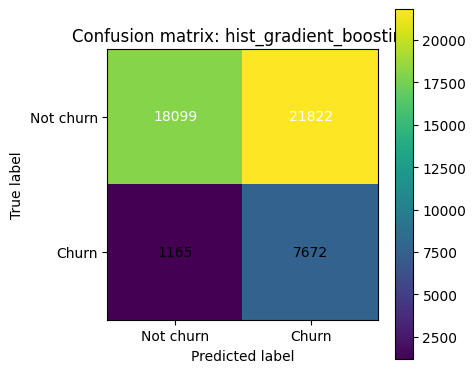

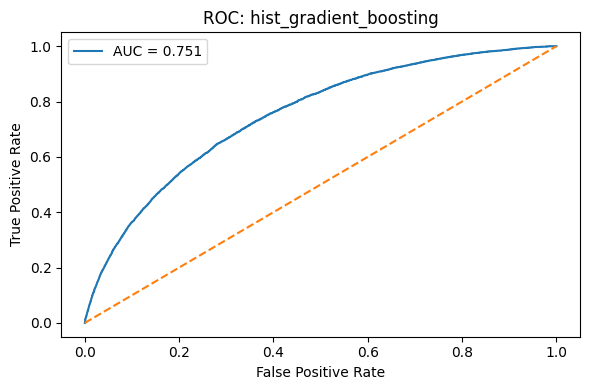

AUC: 0.7507  |  AP: 0.4027  |  F2-tuned threshold: 0.11
Precision: 0.2601  Recall: 0.8682  F1: 0.4003
Confusion matrix [[TN, FP],[FN, TP]]:
 [[18099 21822]
 [ 1165  7672]]

Training xgboost ...


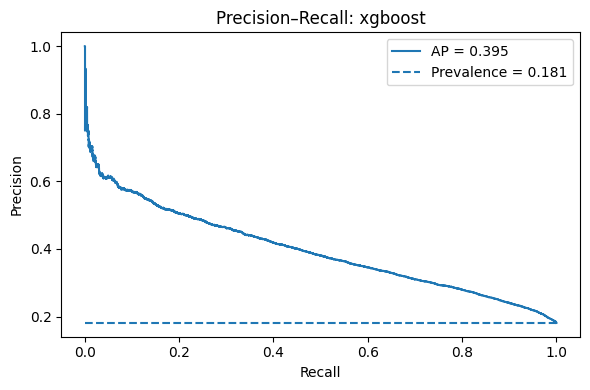

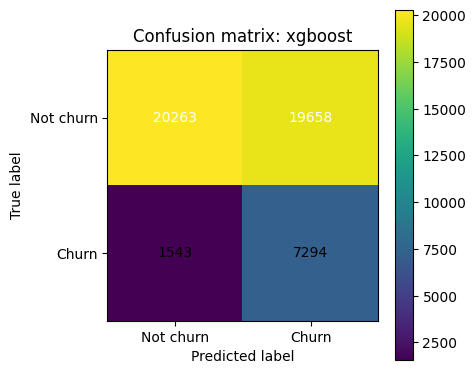

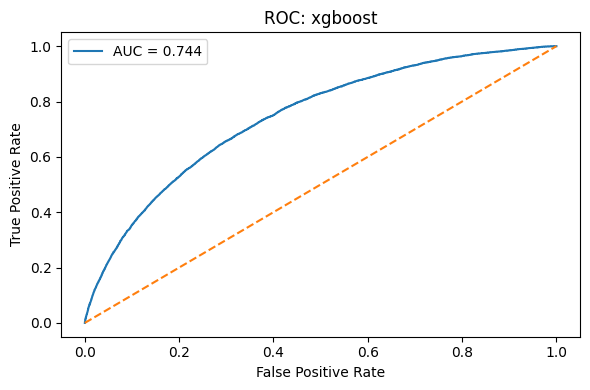

AUC: 0.7439  |  AP: 0.3952  |  F2-tuned threshold: 0.36
Precision: 0.2706  Recall: 0.8254  F1: 0.4076
Confusion matrix [[TN, FP],[FN, TP]]:
 [[20263 19658]
 [ 1543  7294]]

Training lightgbm ...
[LightGBM] [Info] Number of positive: 35345, number of negative: 159684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 195029, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181229 -> initscore=-1.508040
[LightGBM] [Info] Start training from score -1.508040


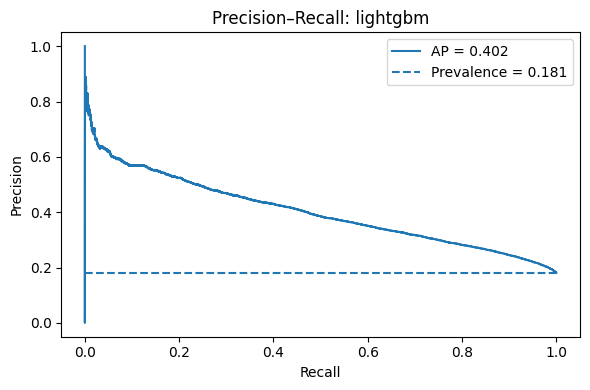

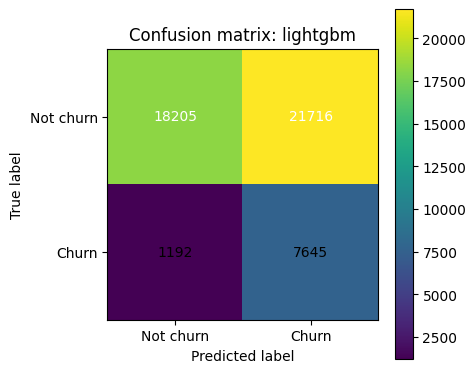

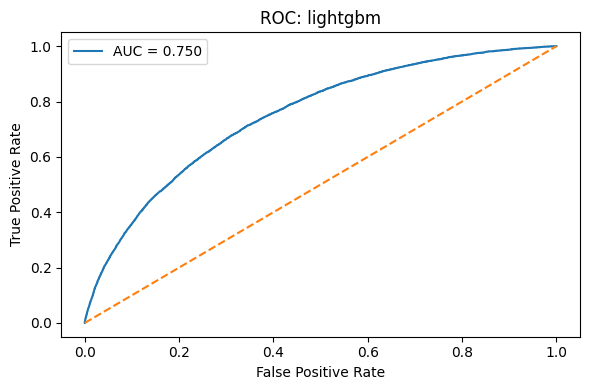

AUC: 0.7496  |  AP: 0.4024  |  F2-tuned threshold: 0.34
Precision: 0.2604  Recall: 0.8651  F1: 0.4003
Confusion matrix [[TN, FP],[FN, TP]]:
 [[18205 21716]
 [ 1192  7645]]

=== Model comparison (sorted by AP) ===
                 model      auc       ap  precision   recall       f1  threshold
  logistic_elastic_net 0.754450 0.408685   0.265125 0.860360 0.405342       0.37
   logistic_regression 0.754449 0.408684   0.265100 0.860247 0.405299       0.37
hist_gradient_boosting 0.750749 0.402740   0.260121 0.868168 0.400303       0.11
              lightgbm 0.749569 0.402354   0.260379 0.865113 0.400283       0.34
               xgboost 0.743942 0.395245   0.270629 0.825393 0.407611       0.36
         random_forest 0.743681 0.392640   0.252595 0.873034 0.391823       0.12


In [39]:
rows = []
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train, y_train)

    # Validation probabilities
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_valid)[:, 1]
    else:
        # fallback
        try:
            proba = model.decision_function(X_valid)
        except:
            proba = model.predict(X_valid).astype(float)

    # Metrics
    auc = roc_auc_score(y_valid, proba)
    ap = average_precision_score(y_valid, proba)
    t_opt = tune_threshold(y_valid, proba, objective="f2")
    y_pred = (proba >= t_opt).astype(int)

    prec = precision_score(y_valid, y_pred, zero_division=0)
    rec  = recall_score(y_valid, y_pred, zero_division=0)
    f1   = f1_score(y_valid, y_pred, zero_division=0)
    cm   = confusion_matrix(y_valid, y_pred)

    plot_pr_curve(y_valid, proba, name)
    plot_confusion_matrix(cm, name=name)
    plot_roc_curve(y_valid, proba, name)

    print(f"AUC: {auc:.4f}  |  AP: {ap:.4f}  |  F2-tuned threshold: {t_opt:.2f}")
    print(f"Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}")
    print("Confusion matrix [[TN, FP],[FN, TP]]:\n", cm)

    rows.append({
        "model": name, "auc": auc, "ap": ap, "threshold": t_opt,
        "precision": prec, "recall": rec, "f1": f1,
        "tn": int(cm[0,0]), "fp": int(cm[0,1]), "fn": int(cm[1,0]), "tp": int(cm[1,1])
    })

# Summary table sorted by AP (PR-AUC is best for imbalanced churn)
summary = pd.DataFrame(rows).sort_values("ap", ascending=False)
print("\n=== Model comparison (sorted by AP) ===")
print(summary[["model","auc","ap","precision","recall","f1","threshold"]].to_string(index=False))

Top 10 Global Feature Importances according to my best performing model  - Churn Drivers

(use these top features to guide actionable retention programs for at-risk customers)

using shap for model interpretability

I applied SHAP to Logistic Elastic Net because it offered the best balance of model performance (highest AP, strong ROC-AUC) and interpretability, allowing us to clearly explain feature contributions to churn predictions.

In [ ]:
from sklearn.inspection import permutation_importance
import shap

def get_feature_names_from_preprocessor(preprocessor):
    """
    Works for ColumnTransformer with 'num' and 'cat' pipelines
    using steps: ('imp','sc') for num and ('imp','onehot') for cat.
    """
    # sklearn >= 1.0
    names = preprocessor.get_feature_names_out()
    # Clean prefixes like 'num__' and 'cat__'
    clean = [n.replace("num__", "").replace("cat__", "") for n in names]
    return np.array(clean)

def is_tree_estimator(est):
    tree_types = (
        "HistGradientBoostingClassifier",
        "RandomForestClassifier",
        "XGBClassifier",
        "LGBMClassifier",
        #"CatBoostClassifier",
    )
    return any(t in est.__class__.__name__ for t in tree_types)

def generate_insights(model_pipeline, X_val, y_val, top_n=15, high_risk_quantile=0.90):
    """
    model_pipeline: your fitted Pipeline([('pre', ...), ('clf', ...)])
    X_val, y_val: validation split BEFORE preprocessing
    """
    pre = model_pipeline.named_steps["pre"]
    clf = model_pipeline.named_steps["clf"]

    # 0) Prepare transformed features and names
    X_val_proc = pre.transform(X_val)
    feature_names = get_feature_names_from_preprocessor(pre)

    # 1) Global importance (tree-based if available, else permutation importance)
    try:
        importances = getattr(clf, "feature_importances_", None)
        if importances is not None and len(importances) == X_val_proc.shape[1]:
            imp = np.asarray(importances)
        else:
            raise AttributeError
    except Exception:
        # permutation importance on the full pipeline (safer, model-agnostic)
        perm = permutation_importance(
            model_pipeline, X_val, y_val,
            n_repeats=5, random_state=42, scoring="average_precision"
        )
        imp = perm.importances_mean

    top_idx = np.argsort(-imp)[:top_n]
    plt.figure(figsize=(9, 5))
    plt.barh(feature_names[top_idx][::-1], imp[top_idx][::-1])
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} global feature importances")
    plt.tight_layout()
    plt.show()

    # 2) SHAP explanations
    # Use TreeExplainer for tree models; LinearExplainer for logistic; fallback to Explainer.
    try:
        if is_tree_estimator(clf):
            explainer = shap.TreeExplainer(clf)
            shap_values = explainer.shap_values(X_val_proc)
            # TreeExplainer can return list for binary; unify to array of shape (n, d)
            if isinstance(shap_values, list):
                shap_vals = shap_values[1] if len(shap_values) > 1 else shap_values[0]
            else:
                shap_vals = shap_values
        elif clf.__class__.__name__ == "LogisticRegression":
            explainer = shap.LinearExplainer(clf, X_val_proc, feature_perturbation="interventional")
            shap_vals = explainer.shap_values(X_val_proc)
        else:
            explainer = shap.Explainer(clf, X_val_proc)
            shap_vals = explainer(X_val_proc).values
    except Exception as e:
        print(f"SHAP fallback due to: {e}")
        explainer = shap.Explainer(clf, X_val_proc)
        shap_vals = explainer(X_val_proc).values

    # Show overall SHAP summary
    shap.summary_plot(shap_vals, X_val_proc, feature_names=feature_names, max_display=top_n, show=True)

    # 3) High-risk customer profile (top X% by predicted probability)
    if hasattr(model_pipeline, "predict_proba"):
        y_proba = model_pipeline.predict_proba(X_val)[:, 1]
    else:
        # fallback
        try:
            y_proba = model_pipeline.decision_function(X_val)
        except:
            y_proba = model_pipeline.predict(X_val).astype(float)

    thr = np.quantile(y_proba, high_risk_quantile) #getting threshold 
    mask = y_proba >= thr
    high_risk = X_val.loc[mask]

    print(f"\nHigh-risk slice: top {int((1-high_risk_quantile)*100)}% (threshold ~ {thr:.3f}), n={high_risk.shape[0]}")
    if not high_risk.empty:
        # set of key features that are most likely to explain why these customers are at high risk
        cols_to_show = [
            "SubscriptionType","PaymentMethod","MonthlyCharges",
            "SupportTicketsPerMonth","AccountAge","ContentDownloadsPerMonth",
            "ViewingHoursPerWeek"
        ]
        cols_to_show = [c for c in cols_to_show if c in high_risk.columns]
        if cols_to_show:
            print(high_risk[cols_to_show].describe(percentiles=[0.25, 0.5, 0.75]).T)

    return {"feature_names": feature_names, "shap_values": shap_vals, "high_risk_threshold": float(thr)}

c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
best_model_name = summary.iloc[0]["model"]
print(best_model_name)
best_model = models[best_model_name]
best_model

logistic_elastic_net


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AccountAge',
                                                   'MonthlyCharges',
                                                   'TotalCharges',
                                                   'ViewingHoursPerWeek',
                                                   'AverageViewingDuration',
                                                   'ContentDownloadsPerMonth',
                                                   'UserRating',
                                                   'SupportTicketsPerMonth',
                                                   'WatchlistSize']),
                                                 ('cat',
                                                  Pipeline(steps...
                                                                                 sparse_output=False))]),
                                                  ['SubscriptionType',
                                                   'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'ContentType',
                                                   'MultiDeviceAccess',
                                                   'DeviceRegistered',
                                                   'GenrePreference', 'Gender',
                                                   'ParentalControl',
                                                   'SubtitlesEnabled'])])),
                ('clf',
                 LogisticRegression(class_weight={0: 0.6106717016106811,
                                                  1: 2.7589333710567265},
                                    l1_ratio=0.5, max_iter=1500,
                                    penalty='elasticnet', random_state=42,
                                    solver='saga'))])

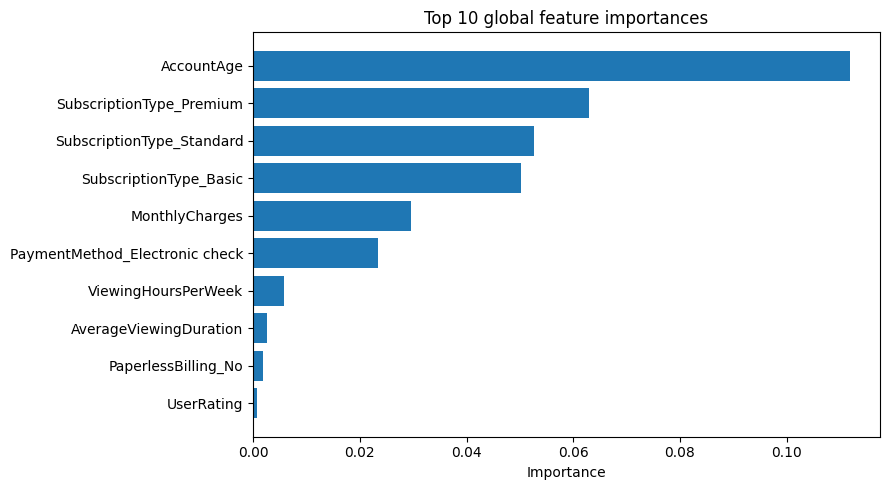

c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


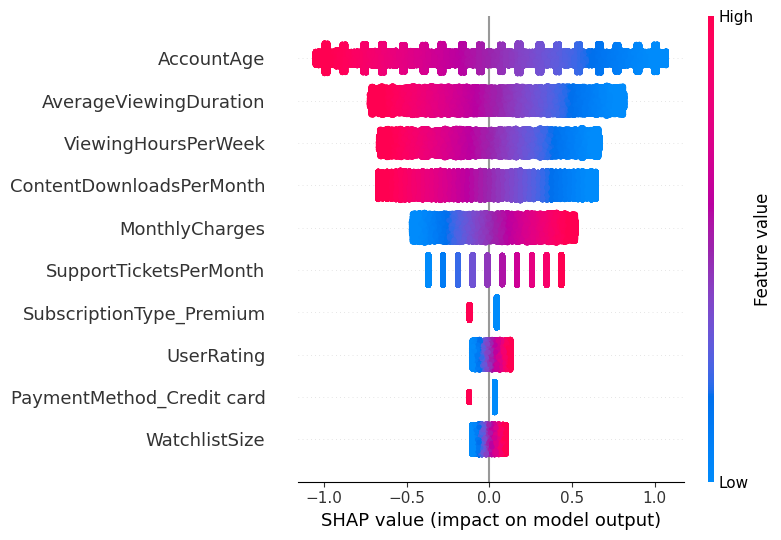


High-risk slice: top 9% (threshold ~ 0.738), n=4876
                           count       mean        std       min        25%  \
MonthlyCharges            4876.0  14.760082   3.863386  4.994969  12.104342   
SupportTicketsPerMonth    4876.0   5.797375   2.652442  0.000000   4.000000   
AccountAge                4876.0  26.694832  21.222851  1.000000  10.000000   
ContentDownloadsPerMonth  4876.0  15.124077  12.129168  0.000000   5.000000   
ViewingHoursPerWeek       4876.0  12.739940   9.087728  1.000086   5.287932   

                                50%        75%         max  
MonthlyCharges            15.653576  18.041826   19.986986  
SupportTicketsPerMonth     6.000000   8.000000    9.000000  
AccountAge                22.000000  39.000000  118.000000  
ContentDownloadsPerMonth  12.000000  23.000000   49.000000  
ViewingHoursPerWeek       10.695908  18.439695   39.912968  


In [ ]:
# Use the same validation split we used for metrics
insights = generate_insights(
    model_pipeline=best_model,
    X_val=X_valid,  # raw features (not transformed)
    y_val=y_valid,
    top_n=10,
    high_risk_quantile=0.90 #Customers whose churn probability is in the top 10% are "high risk".
)


the top 10% highest-probability churners  tend to have higher monthly charges, lower viewing engagement, and more frequent support tickets

Data Source: Kaggle

Reference: https://www.kaggle.com/code/ayobamimike/churnshield-predictive-customer-retention-platform